In [1]:
# common imports

import matplotlib.pyplot as plt
import numpy as np

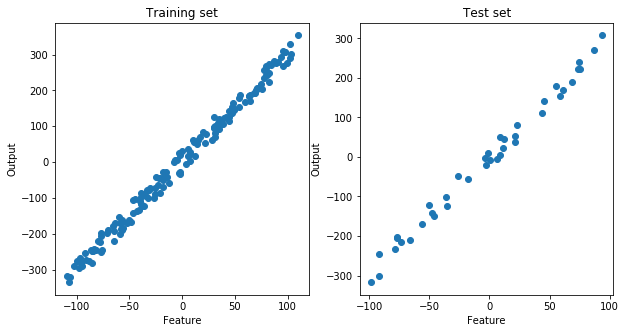

In [123]:
# generate a dataset

import random

def f(x):
    slope = 3
    yIntersept = 4
    yVariance = 30
    return (slope * x) + yIntersept + random.uniform(-yVariance, yVariance)

xVariance = 15
features = [x + random.uniform(-xVariance, xVariance) for x in range(-100, 100)]
outputs = list(map(f, features))

allDataSet = list(zip(features, outputs))
random.shuffle(allDataSet)
trainingSet = allDataSet[:160]
testSet = allDataSet[161:]

# plot data sets
fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

pltLeft.title.set_text('Training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

pltRight.title.set_text('Test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet))

In [108]:
# introduce a cost function

def predict(feature, parameters):
    # TODO: vectorize in more complex case
    return parameters[0] + (parameters[1] * feature)

def calcSquaredDiff(example, parameters):
    diff = predict(example[0], parameters) - example[1]
    return diff ** 2

def cost(dataSet, parameters):
    squaredDiff = map(lambda example: calcSquaredDiff(example, parameters), dataSet)
    return sum(squaredDiff) / (2 * len(dataSet))

cost([(1, 2), (2, 5)], [0, 0]) == 7.25

True

In [109]:
# minimize the cost function

# <-- cost function derivatives -->
def costPrime(example, parameters):
    return (predict(example[0], parameters) - example[1]) * example[0]
def costPrimeBias(example, parameters):
    return (predict(example[0], parameters) - example[1])
# </- cost function derivatives -->

def loss(dataSet, parameters, costPrimeFunc):
    errors = map(lambda example: costPrimeFunc(example, parameters), dataSet)
    return sum(errors) / len(dataSet)

def minimize(dataSet, parameters, learningRate):    
    parameters[0] -= learningRate * loss(dataSet, parameters, costPrimeBias)
    parameters[1] -= learningRate * loss(dataSet, parameters, costPrime)
    
    return parameters

# TODO: unit test

Error: (34, 'Result too large') with learning rate = 0.01
Error: (34, 'Result too large') with learning rate = 0.03
Error: (34, 'Result too large') with learning rate = 0.001
Error: (34, 'Result too large') with learning rate = 0.003

Best learning rate = 0.0003


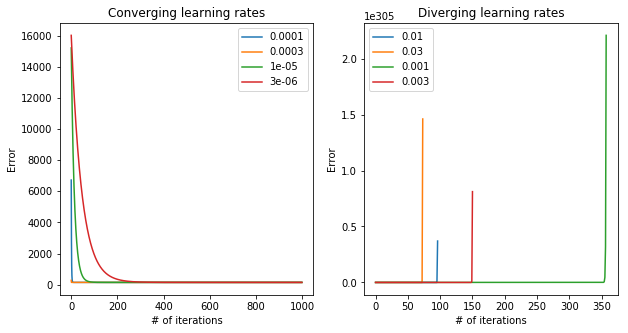

In [124]:
# try different learning rates

def tryLearningRate(dataSet, learningRate):
    parameters = [0, 0]
    errorOverIterations = []
    for iterationNumber in range(1000):
        parameters = minimize(dataSet, parameters, learningRate)
        try:
            error = cost(trainingSet, parameters)
        except BaseException as e:
            print(f'Error: {e} with learning rate = {learningRate}')
            break

        errorOverIterations.append((iterationNumber, error))
    
    return errorOverIterations

def tryLearningRates(learningRates, plot):
    for learningRate in learningRates:
        errorOverIterations = tryLearningRate(trainingSet, learningRate)
        plot.plot(*zip(*errorOverIterations), label=learningRate)



fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- converging learning rates -->
tryLearningRates([0.0001, 0.0003, 0.00001, 0.000003], pltLeft)
pltLeft.title.set_text('Converging learning rates')
pltLeft.set_xlabel('# of iterations')
pltLeft.set_ylabel('Error')
pltLeft.legend()
# </- converging learning rates -->

# <-- diverging learning rates -->
tryLearningRates([0.01, 0.03, 0.001, 0.003], pltRight)
pltRight.title.set_text('Diverging learning rates')
pltRight.set_xlabel('# of iterations')
pltRight.set_ylabel('Error')
pltRight.legend()
# </- diverging learning rates -->

learningRate = 0.0003
print(f'\nBest learning rate = {learningRate}')

Learned parameters = [0.9446863214201838, 2.987469366503567]


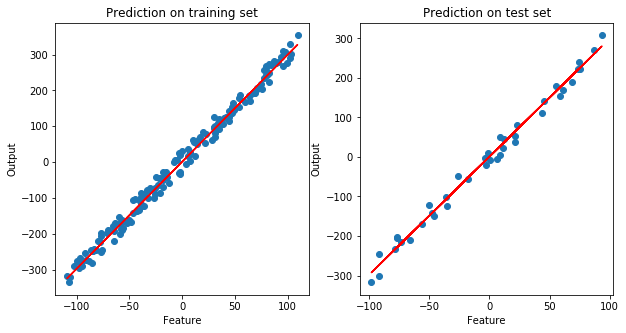

In [129]:
# learn the parameters

def learn(dataSet, learningRate):
    parameters = [0, 0]
    jOverIterations = []
    # TODO: use some stopping criteria
    for numOfIteration in range(1000):
        parameters = minimize(dataSet, parameters, learningRate)
        error = cost(trainingSet, parameters)
    
    return parameters


parameters = learn(trainingSet, 0.0003)
print(f'Learned parameters = {parameters}')


# plot predictions
def makePrediction(features):
    return list(map(lambda example: predict(example, parameters), features))

fig, (pltLeft, pltRight) = plt.subplots(1, 2, figsize=(10, 5))

# <-- plot prediction on training set ->
pltLeft.title.set_text('Prediction on training set')
pltLeft.set_xlabel('Feature')
pltLeft.set_ylabel('Output')
pltLeft.scatter(*zip(*trainingSet))

trainingFeatures = list(zip(*trainingSet))[0]
trainingOutputs = makePrediction(trainingFeatures)
pltLeft.plot(trainingFeatures, trainingOutputs, 'r')
# </- plot prediction on training set ->

# <-- plot prediction on test set ->
pltRight.title.set_text('Prediction on test set')
pltRight.set_xlabel('Feature')
pltRight.set_ylabel('Output')
pltRight.scatter(*zip(*testSet))

testFeatures = list(zip(*testSet))[0]
testOutputs = makePrediction(testFeatures)
pltRight.plot(testFeatures, testOutputs, 'r')
# </- plot prediction on test set ->

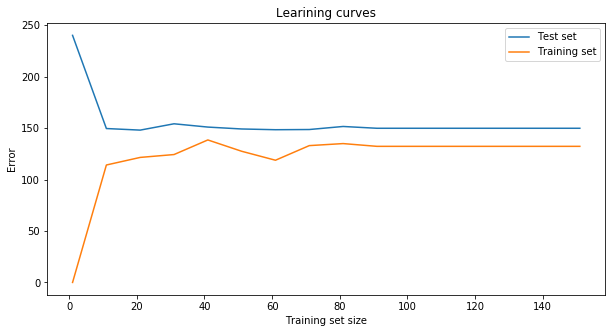

In [128]:
# plot the learning curves

testSetLearningCurve = []
trainingSetLearningCurve = []
for numberOfExamples in range(1, len(trainingSet), 10):
    learningCurveDataSet = dataSet[:numberOfExamples]
    parameters = learn(learningCurveDataSet, 0.0003)
    
    testSetError = cost(testSet, parameters)
    testSetLearningCurve.append((numberOfExamples, testSetError))
    
    trainingSetError = cost(learningCurveDataSet, parameters)
    trainingSetLearningCurve.append((numberOfExamples, trainingSetError))


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(*zip(*testSetLearningCurve), label='Test set')
ax.plot(*zip(*trainingSetLearningCurve), label='Training set')

ax.title.set_text('Learining curves')
ax.set_xlabel('Training set size')
ax.set_ylabel('Error')
ax.legend()